<a href="https://colab.research.google.com/github/FatmaKMohamed/Retail-Sales-Forecasting-and-Customer-Segmentation/blob/main/Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   First, import libraries needed for cleaning and EDA
*   Exchange the labels for 'sales_price' and 'quantity_sold' because the variation in 'sales_price' is higher than 'quantity_sold' and it is illogical; the reverse scenario makes more sense.
* load the dataset



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
custom_column_names = [
    "date",
    "product_ID",
    "sales_price",
    "quantity_sold",
    "Category",
    "customer_id",
    "age",
    "gender",
    "purchase_frequency",
    "total_purchase_amount"
]
df = pd.read_csv('/content/your_dataset - your_dataset (1).csv')
df.columns = custom_column_names
df.head()

,date,product_ID,sales_price,quantity_sold,Category,customer_id,age,gender,purchase_frequency,total_purchase_amount
0,1/1/2020,22.0,112.0,44,Electronics,1,25,m,1,1132.0
1,1/2/2020,32.0,323.0,7,Clothing,2,33,m,5,2233.0
2,1/3/2020,11.0,223.0,55,Furniture,3,52,f,6,2332.0
3,1/4/2020,33.0,43.0,74,Grocery,4,29,m,8,5432.0
4,1/5/2020,26.0,643.0,39,Stationery,5,36,m,5,5544.0


# Data Cleaning

In [ ]:
#Check missing values
df.isnull().sum()

date                     0
product_ID               2
sales_price              2
quantity_sold            0
Category                 0
customer_id              0
age                      0
gender                   0
purchase_frequency       0
total_purchase_amount    3
dtype: int64

In [ ]:
# replace missing values in quantity and price with their maen
df['quantity_sold'].fillna(value=df['quantity_sold'].mean(), inplace=True)
df['sales_price'].fillna(value=df['sales_price'].mean(), inplace=True)

In [ ]:
#recalculte total_purchase_amount as it was calculated wrong
df['total_purchase_amount'] = df['quantity_sold'] * df['sales_price']

In [ ]:
df.isnull().sum()

date                     0
product_ID               2
sales_price              0
quantity_sold            0
Category                 0
customer_id              0
age                      0
gender                   0
purchase_frequency       0
total_purchase_amount    0
dtype: int64

In [ ]:
# drop the remaining missing values as they are only 2
df.dropna(axis=0, inplace=True)

In [ ]:
#Check duplicates
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1094 non-null   object 
 1   product_ID             1094 non-null   float64
 2   sales_price            1094 non-null   float64
 3   quantity_sold          1094 non-null   int64  
 4   Category               1094 non-null   object 
 5   customer_id            1094 non-null   int64  
 6   age                    1094 non-null   int64  
 7   gender                 1094 non-null   object 
 8   purchase_frequency     1094 non-null   int64  
 9   total_purchase_amount  1094 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 94.0+ KB


In [ ]:
#Perform all mapping and data type conversion needed
df['product_ID'] = df['product_ID'].astype(int)
df['quantity_sold'] = df['quantity_sold'].astype(int)
df['sales_price'] = df['sales_price'].astype(int)
df['total_purchase_amount'] = df['total_purchase_amount'].astype(int)
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%d/%m/%Y')
df['gender'] = df['gender'].map({'m': 'Male', 'f': 'Female'})

modify 'product_ID' by making it start by the first letter in its ‘category’ and the 'product_ID'.

For example :C-11 for product 11 in clothing category


In [ ]:
# modify product_id
df['product_ID'] = df['Category'].str[0] + "-" + df['product_ID'].astype(str)
df['product_ID'].head()

0    E-22
1    C-32
2    F-11
3    G-33
4    S-26
Name: product_ID, dtype: object

In [ ]:
# Generate descriptive statistics of data
df.describe()

,sales_price,quantity_sold,customer_id,age,purchase_frequency,total_purchase_amount
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.00000
mean,121.541133,69.050274,12.957038,40.351920,4.648995,8408.29159
std,167.676123,77.911568,7.195797,13.746014,2.514589,21590.03828
min,7.000000,7.000000,1.000000,23.000000,1.000000,49.00000
25%,33.000000,26.000000,7.000000,29.000000,2.000000,968.00000
50%,51.000000,44.000000,13.000000,36.000000,5.000000,2420.00000
75%,112.000000,74.000000,19.000000,52.000000,7.000000,7106.00000
max,643.000000,323.000000,25.000000,65.000000,9.000000,207689.00000


# Exploratory Data Analysis (EDA)

**Sales trends**

From January 2020 to January 2022, we achieved the highest sales in the third quarter of 2022, particularly in July, with a total of 439,320. This amount represents approximately 4.45% of the total sales during this two-year period, which amounted to 9,878,791.

In [ ]:
#get sales over quarters
Sales_by_quarter = df.groupby(pd.Grouper(key='date', freq='Q')).sum()['total_purchase_amount'].reset_index()
Sales_by_quarter

<ipython-input-12-d1223678c61a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sales_by_quarter = df.groupby(pd.Grouper(key='date', freq='Q')).sum()['total_purchase_amount'].reset_index()


,date,total_purchase_amount
0,2020-03-31,756703
1,2020-06-30,662534
2,2020-09-30,824689
3,2020-12-31,793967
4,2021-03-31,827080
5,2021-06-30,622666
6,2021-09-30,857050
7,2021-12-31,758978
8,2022-03-31,860229
9,2022-06-30,606309


<ipython-input-13-71219dfa51b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(key='date', freq='Q')).sum()['total_purchase_amount'].reset_index().plot()


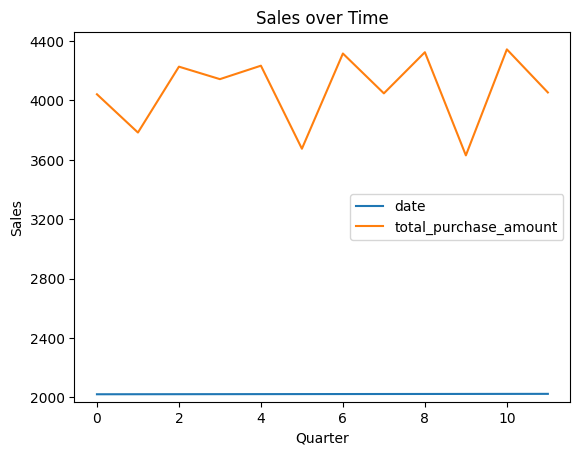

In [ ]:
df.groupby(pd.Grouper(key='date', freq='Q')).sum()['total_purchase_amount'].reset_index().plot()
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.ylim(bottom=0)
plt.show()

In [ ]:
# get sales over months
sales_by_month = df.groupby(pd.Grouper(key='date', freq='M')).sum()['total_purchase_amount'].reset_index()
sales_by_month

<ipython-input-14-32704c84867e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_month = df.groupby(pd.Grouper(key='date', freq='M')).sum()['total_purchase_amount'].reset_index()


,date,total_purchase_amount
0,2020-01-31,191179
1,2020-02-29,215129
2,2020-03-31,350395
3,2020-04-30,283516
4,2020-05-31,167515
5,2020-06-30,211503
6,2020-07-31,381713
7,2020-08-31,291158
8,2020-09-30,151818
9,2020-10-31,227351


<Figure size 1300x500 with 0 Axes>

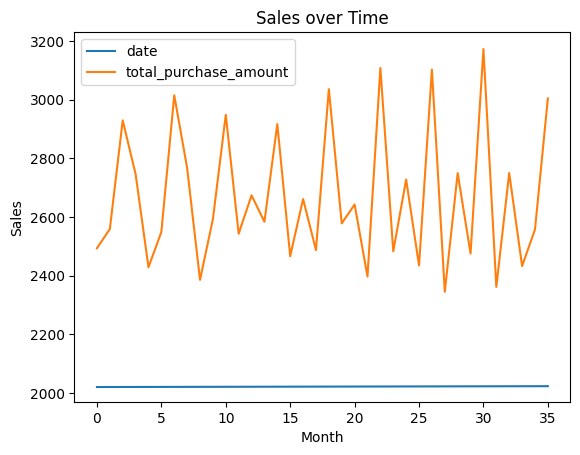

In [ ]:
plt.figure(figsize=(13,5))
sales_by_month.plot()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.ylim(bottom=0)
plt.show()

Over time, the stationery category has consistently achieved the highest sales, while, conversely, the electronics category has consistently recorded the lowest sales.

In [ ]:
#get sales over months for each category
grouped_month = df.groupby([pd.Grouper(key='date', freq='M'), 'Category'])['total_purchase_amount'].sum().reset_index()
pivot_month = grouped_month.pivot(index='date', columns='Category', values='total_purchase_amount')
pivot_month

Category,Clothing,Electronics,Furniture,Grocery,Stationery
date,,,,,
2020-01-31,40005,22605,31666,28465,68438
2020-02-29,100992,45788,18286,25956,24107
2020-03-31,23015,24121,15610,23810,263839
2020-04-30,62614,13203,73590,54082,80027
2020-05-31,28484,14322,15164,50741,58804
2020-06-30,94118,45706,26091,18641,26947
2020-07-31,54248,22458,24307,28478,252222
2020-08-31,54330,27297,73590,47787,88154
2020-09-30,22240,13024,15164,24554,76836


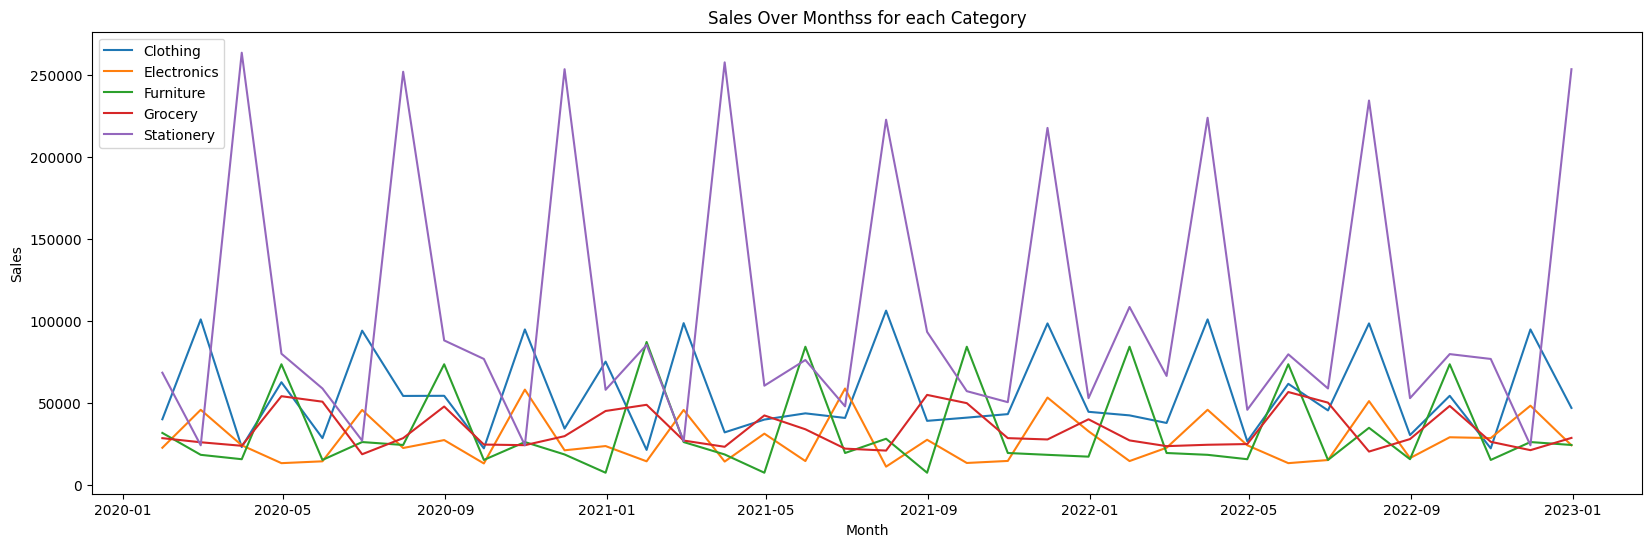

In [ ]:
plt.figure(figsize=(20, 6))

for category in pivot_month.columns:
    plt.plot(pivot_month.index, pivot_month[category], label=category)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Over Monthss for each Category')
plt.legend()
plt.show()

**customer behavior**

In [ ]:
#get number of orders for each customer and it's the same for each
purchase_frequency_by_customer = df.groupby('customer_id')['purchase_frequency'].max().reset_index()
purchase_frequency_by_customer

,customer_id,purchase_frequency
0,1,9
1,2,9
2,3,9
3,4,9
4,5,9
5,6,9
6,7,9
7,8,9
8,9,9
9,10,9


The age distribution indicates that our highest volume of orders comes from customers under 40 years old. In contrast, the age group between 40 and 50 corresponds to the lowest number of orders.

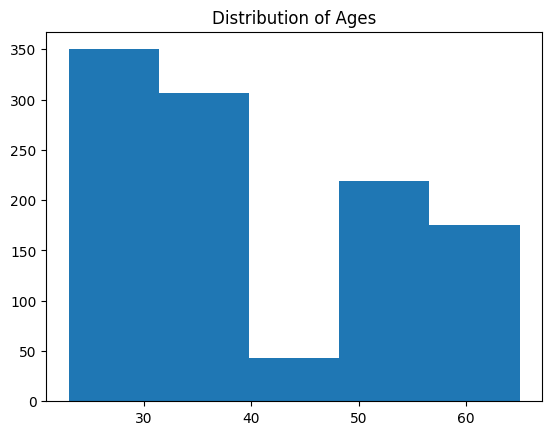

In [ ]:
plt.hist(df['age'], bins=5)
plt.title('Distribution of Ages')
plt.show()

In [ ]:
# dividing ages into 6 classes
bins = [20, 30, 40, 50, 60,70]
labels = ['20-29 years', '30-39 years', '40-49 years', '50-60 years','60-70 years']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df[['age_group','age']].head()

,age_group,age
0,20-29 years,25
1,30-39 years,33
2,50-60 years,52
3,20-29 years,29
4,30-39 years,36


We attained peak sales from customers aged 20-30, while the lowest sales were recorded in the 40-50 age group

In [ ]:
#get quantity sold and sales by age group
sales_by_age = df.groupby(df['age_group']).agg({'total_purchase_amount': 'sum', 'quantity_sold': 'sum'}).reset_index()
sales_by_age

,age_group,total_purchase_amount,quantity_sold
0,20-29 years,2765292,24118
1,30-39 years,2664383,21283
2,40-49 years,706397,5864
3,50-60 years,1660825,12289
4,60-70 years,1401774,11987


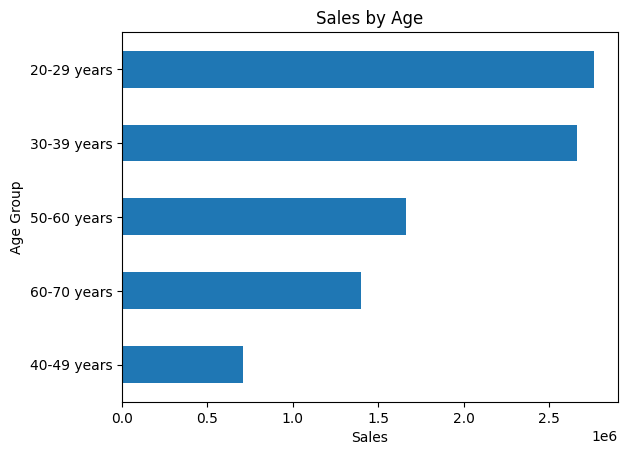

In [ ]:
sorted_sales_by_age = sales_by_age.groupby('age_group')['total_purchase_amount'].sum().sort_values(ascending=True)
sorted_sales_by_age.plot(kind='barh')
plt.ylabel('Age Group')
plt.xlabel('Sales')
plt.title('Sales by Age')
plt.show()

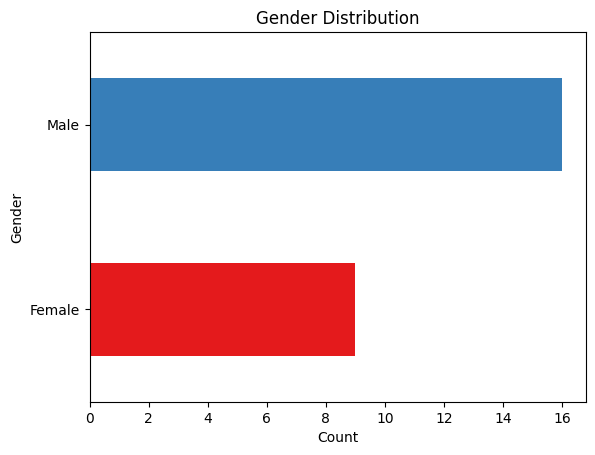

In [ ]:
#gender distribution
customer_gender = df.groupby('customer_id')['gender'].first().reset_index()
customer_gender.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set1'))
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Distribution')
plt.show()

The sales data reveals that females account for approximately 35.6% of the total sales, while males contribute to about 64.4%

In [ ]:
#get quantity sold and sales by gender
sales_by_gender = df.groupby('gender').agg({'total_purchase_amount': 'sum', 'quantity_sold': 'sum'}).reset_index()
sales_by_gender

,gender,total_purchase_amount,quantity_sold
0,Female,3274434,27053
1,Male,5924237,48488


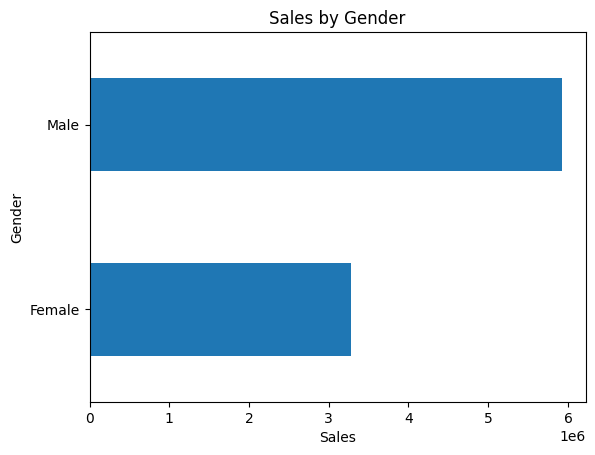

In [ ]:
sorted_sales_by_gender = sales_by_gender.groupby('gender')['total_purchase_amount'].sum().sort_values(ascending=True)
sorted_sales_by_gender.plot(kind='barh')
plt.ylabel('Gender')
plt.xlabel('Sales')
plt.title('Sales by Gender')
plt.show()







*   Customer ID 19 has the highest sales amount of 598,812
*   Customer ID 23 has the lowest sales amount of 249,246






---


* Customer ID 12 has the highest quantity sold, with 3,261 items
* Customer ID 23 has the lowest quantity sold, with 2,760 items.



In [ ]:
#get quantity sold and sales by customer
sales_by_customer = df.groupby('customer_id').agg({'total_purchase_amount': 'sum', 'quantity_sold': 'sum'}).reset_index()
sales_by_customer

,customer_id,total_purchase_amount,quantity_sold
0,1,324930,3245
1,2,295543,2980
2,3,255549,2891
3,4,249246,3064
4,5,275436,2977
5,6,276164,2917
6,7,266601,2836
7,8,305931,3256
8,9,277871,3047
9,10,271062,2875


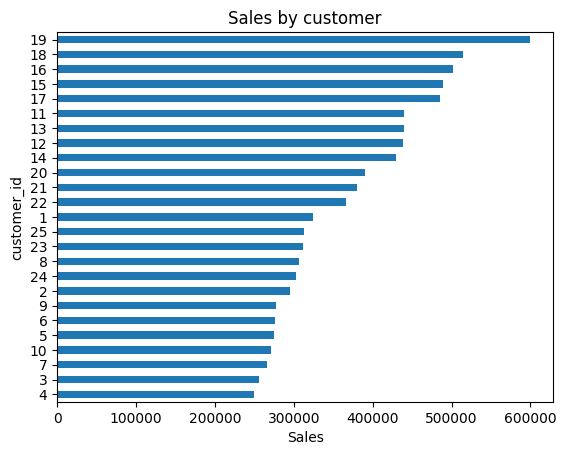

In [ ]:
sorted_sales_by_customer = sales_by_customer.groupby('customer_id')['total_purchase_amount'].sum().sort_values(ascending=True)
sorted_sales_by_customer.plot(kind='barh')
plt.ylabel('customer_id')
plt.xlabel('Sales')
plt.title('Sales by customer')
plt.show()

### popular categories/products

The highest sales category  is "Stationery" with 3,830,064, while the lowest sales category is "Electronics" with 994,962.

In [ ]:
#get quantity sold and sales by category
sales_by_category = df.groupby(df['Category']).agg({'total_purchase_amount': 'sum', 'quantity_sold': 'sum'}).reset_index()
sales_by_category

,Category,total_purchase_amount,quantity_sold
0,Clothing,1995236,13358
1,Electronics,994962,13662
2,Furniture,1178778,5286
3,Grocery,1199631,29551
4,Stationery,3830064,13684


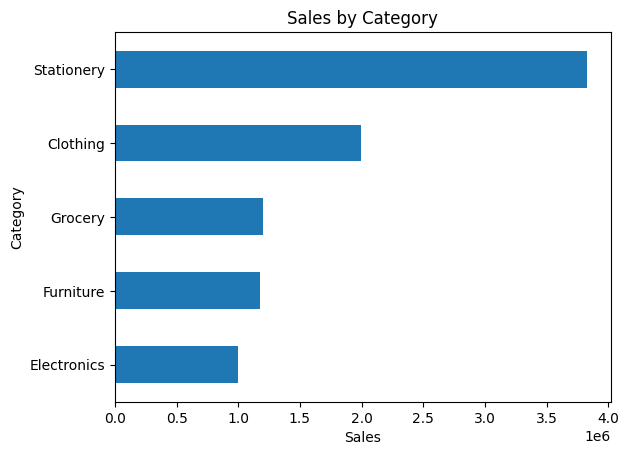

In [ ]:
sorted_sales_by_category = sales_by_category.groupby('Category')['total_purchase_amount'].sum().sort_values(ascending=True)
sorted_sales_by_category.plot(kind='barh')
plt.ylabel('Category')
plt.xlabel('Sales')
plt.title('Sales by Category')
plt.show()

The highest sales product is "S-26" with 1,035,230, while the lowest sales product is "S-32" with $42,735.

In [ ]:
#get quantity sold and sales by product
sales_by_product = df.groupby('product_ID').agg({'total_purchase_amount': 'sum', 'quantity_sold': 'sum'}).reset_index()
sales_by_product

,product_ID,total_purchase_amount,quantity_sold
0,C-11,9303,1329
1,C-13,9121,1303
2,C-17,423776,1312
3,C-32,539951,4024
4,C-33,473841,1467
5,C-51,539244,3923
6,E-11,175952,1571
7,E-13,144144,1287
8,E-17,113337,2718
9,E-22,150864,1347


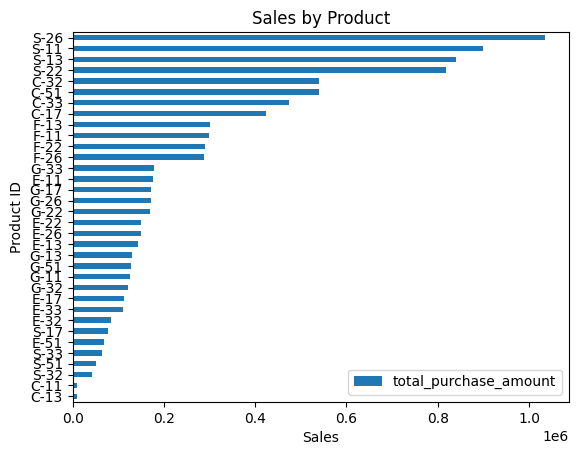

In [ ]:
sales_by_product.sort_values('total_purchase_amount', ascending=True).plot(x='product_ID', y='total_purchase_amount', kind='barh')
plt.ylabel('Product ID')
plt.xlabel('Sales')
plt.title('Sales by Product')
plt.show()

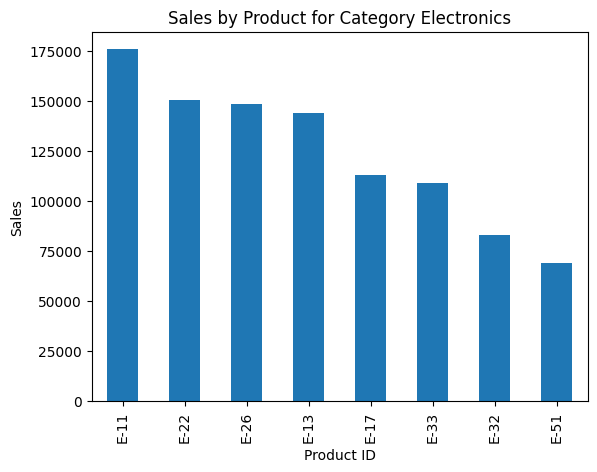

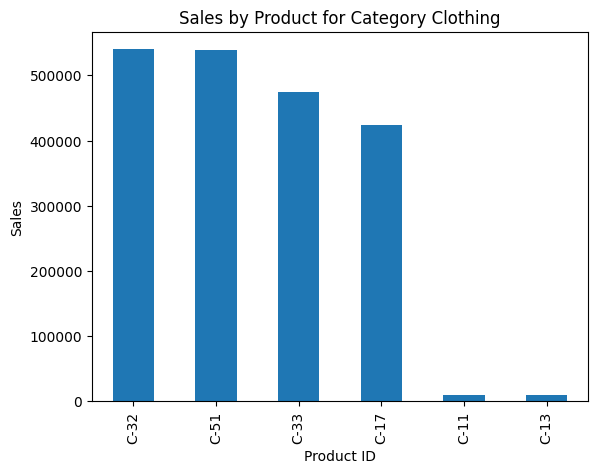

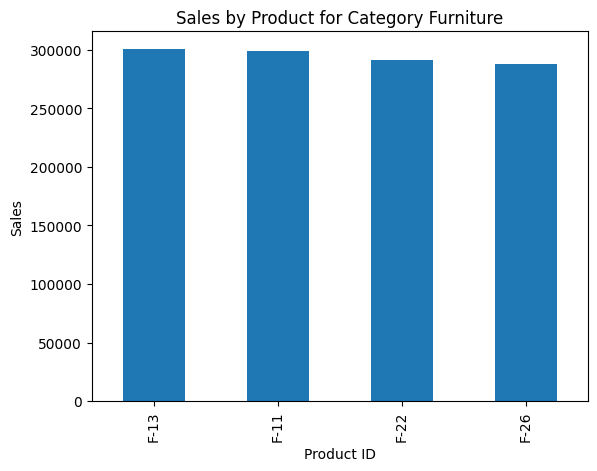

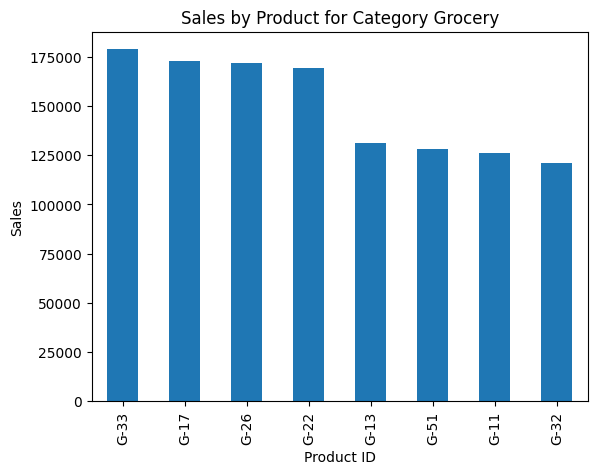

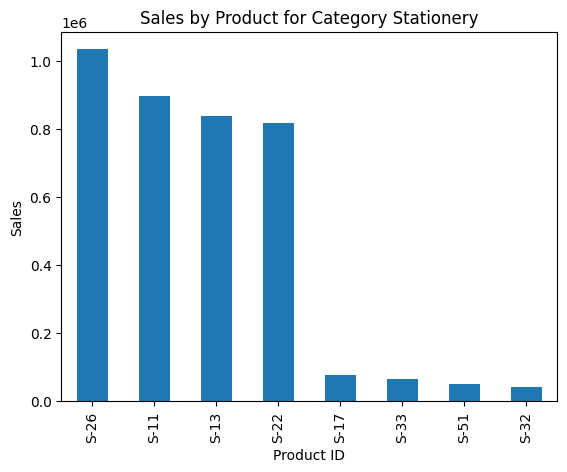

In [ ]:
categories = df['Category'].unique()
for category in categories:
    df_category = df[df['Category'] == category]
    df_category_sorted = df_category.groupby('product_ID')['total_purchase_amount'].sum().sort_values(ascending=False)
    df_category_sorted.plot(kind='bar')
    plt.xlabel('Product ID')
    plt.ylabel('Sales')
    plt.title('Sales by Product for Category {}'.format(category))
    plt.show()

The relationship between the price and quantity

<ipython-input-33-9f2dd5f11b7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_and_quantity.drop_duplicates(inplace=True)


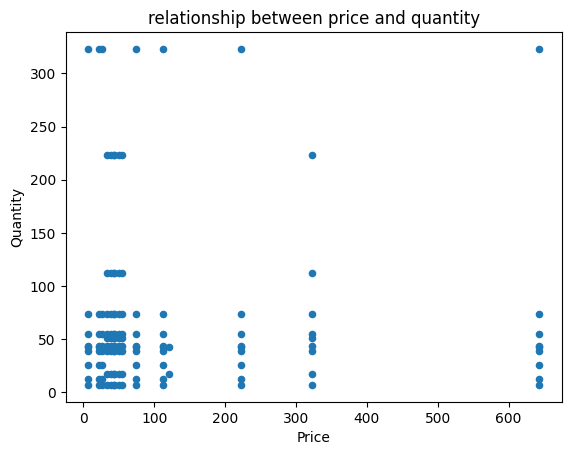

In [ ]:
sales_and_quantity = df[['sales_price','quantity_sold']]
sales_and_quantity.drop_duplicates(inplace=True)
sales_and_quantity.plot(x='sales_price', y='quantity_sold', kind='scatter')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('relationship between price and quantity')
plt.show()

# Time Series Forecasting

### Time Series Analysis

Checking and handling outliers in the sales

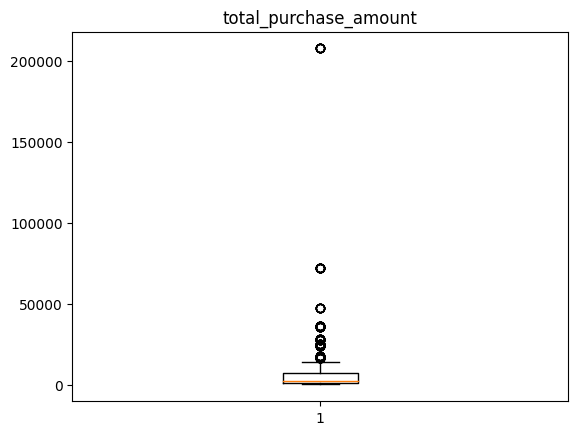

In [ ]:
plt.boxplot(df['total_purchase_amount'])
plt.title('total_purchase_amount')
plt.show()

In [ ]:
df['total_purchase_amount'].sort_values().unique()

array([    49,     91,    154,    182,    231,    273,    286,    301,
          308,    338,    357,    385,    518,    561,    572,    663,
          676,    731,    748,    784,    858,    867,    935,    946,
          962,    968,   1014,   1118,   1144,   1210,   1287,   1430,
         1452,   1456,   1521,   1561,   1628,   1677,   1683,   1716,
         1815,   1892,   1924,   1936,   1989,   2063,   2145,   2193,
         2244,   2261,   2365,   2420,   2442,   2601,   2805,   2886,
         2899,   2912,   3025,   3182,   3256,   3696,   3774,   4070,
         4368,   4501,   4816,   4928,   5219,   5476,   5491,   5712,
         5798,   6160,   7106,   7359,   8288,   8359,   8398,   8697,
         9589,   9812,  11373,  12265,  12597,  14212,  16473,  16502,
        16718,  17765,  23902,  25077,  27649,  28292,  35365,  36176,
        47582,  72029, 207689])

In [ ]:
df['total_purchase_amount'].replace(to_replace=[207689,72029,47582], value=df['total_purchase_amount'].mean().round(), inplace=True)


Check Stationarity using Augmented Dickey-Fuller test To ensure consistency, accuracy, and reliability of data records.

In [ ]:
from statsmodels.tsa.stattools import adfuller

p_value = adfuller(df['total_purchase_amount'])[1]
print("p-value:", p_value)

if p_value <= 0.05:
    print("Reject the null hypothesis. The series is stationary.")
else:
    print("Fail to reject the null hypothesis. The series is non-stationary.")


p-value: 6.069933302775696e-22
Reject the null hypothesis. The series is stationary.


### Data decomposition
We have 3 models: Additive model, Multiplicative model and Mixed model.
We chose the additive model as it's used when seasonal variations are almost constant and their influence on the tendency does not depend on its level.


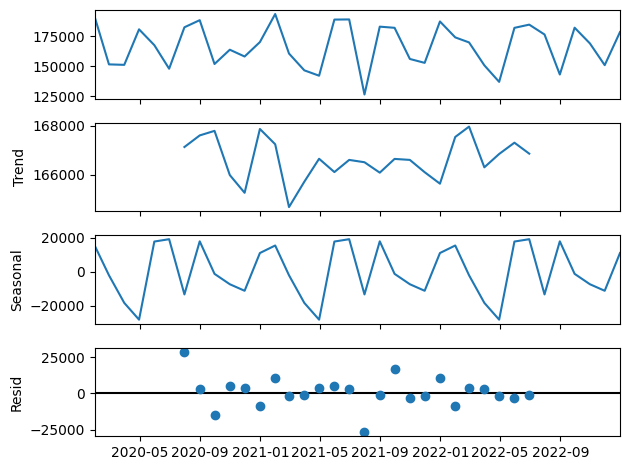

In [ ]:
#Decompose the Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

series = df.groupby(pd.Grouper(key='date', freq='M')).agg({'total_purchase_amount': 'sum'})
result = seasonal_decompose(series, model='additive')

result.plot()
plt.show()

### Quantitative Forecasting

***Exponential Smoothing Forecasting***

Holt-Winters Seasonal Smoothing, also known as the Triple Exponential Smoothing method, is a time series forecasting technique that takes into account seasonality and trend in the data. It is an extension of Holt's method, which considers trend, and includes an additional component for seasonality.


In [ ]:
# Holt-Winter’s Seasonal Smoothing model Implementation
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(series, seasonal_periods=12, trend=None, seasonal='add')
model_fit = model.fit()

# Forecast for 5 months
forecast = model_fit.forecast(5)
forecast.reset_index().columns = ['bbb','hjj']
forecast.reset_index()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,index,0
0,2023-01-31,182859.180906
1,2023-02-28,165345.788415
2,2023-03-31,149122.607380
3,2023-04-30,139249.348367
4,2023-05-31,185191.675912


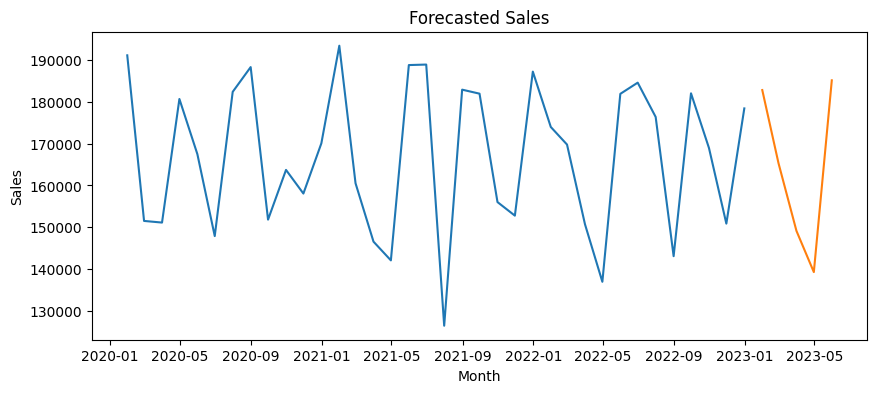

In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 4))
plt.plot(series)
plt.plot(forecast)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Forecasted Sales')
plt.show()


generate forecasts for each category, recognizing the significance of anticipating potential variations. This detailed approach underscores the importance of informed predictions in navigating and adapting to dynamic circumstances within each category.

In [ ]:
#forcast sales for each category
forecast_table = pd.DataFrame()

for category in pivot_month.columns:
    mod = ExponentialSmoothing(pivot_month[category], seasonal_periods=12, trend=None, seasonal='add')
    mod_fit = mod.fit()

    forec = mod_fit.forecast(5).reset_index()

    forecast_df = pd.DataFrame({category: forec[0]})
    date =pd.DataFrame({'date': forec['index']})

    forecast_df.columns = [category]
    forecast_table = pd.concat([forecast_table, forecast_df], axis=1)

forecast_table = pd.concat([date, forecast_table], axis=1)
forecast_table

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/

,date,Clothing,Electronics,Furniture,Grocery,Stationery
0,2023-01-31,33716.501338,15554.012752,84194.015530,37587.154555,108737.437012
1,2023-02-28,69680.523991,34941.775602,22190.766391,25507.353290,66433.811987
2,2023-03-31,67779.062600,30659.595315,17833.145785,23948.747840,224255.556199
3,2023-04-30,35313.393807,28632.465754,9937.368339,33202.123399,45999.364389
4,2023-05-31,55011.116665,14856.037200,77451.915258,44996.864203,79865.388765


## customer segmentation

 utilize an autoencoder-based approach for customer segmentation.The autoencoder model is trained to capture data patterns and reduce dimensionality. The resulting encoder is used for KMeans clustering, categorizing customers into clusters. Cluster means are computed and printed, providing insights into each cluster's characteristics. A 3D plot visualizes the clusters based on sales price, age, and total purchase amount.


Epoch 1/100
28/28 [==============================] - 2s 28ms/step - loss: 1.2799 - val_loss: 1.2639
Epoch 2/100
28/28 [==============================] - 0s 6ms/step - loss: 1.2623 - val_loss: 1.2463
Epoch 3/100
28/28 [==============================] - 0s 7ms/step - loss: 1.2456 - val_loss: 1.2300
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 1.2299 - val_loss: 1.2148
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 1.2152 - val_loss: 1.2007
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 1.2015 - val_loss: 1.1872
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 1.1881 - val_loss: 1.1739
Epoch 8/100
28/28 [==============================] - 0s 6ms/step - loss: 1.1750 - val_loss: 1.1604
Epoch 9/100
28/28 [==============================] - 0s 14ms/step - loss: 1.1620 - val_loss: 1.1473
Epoch 10/100
28/28 [==============================] - 1s 20ms/step - loss: 1.1492 - val_loss: 1.1340
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


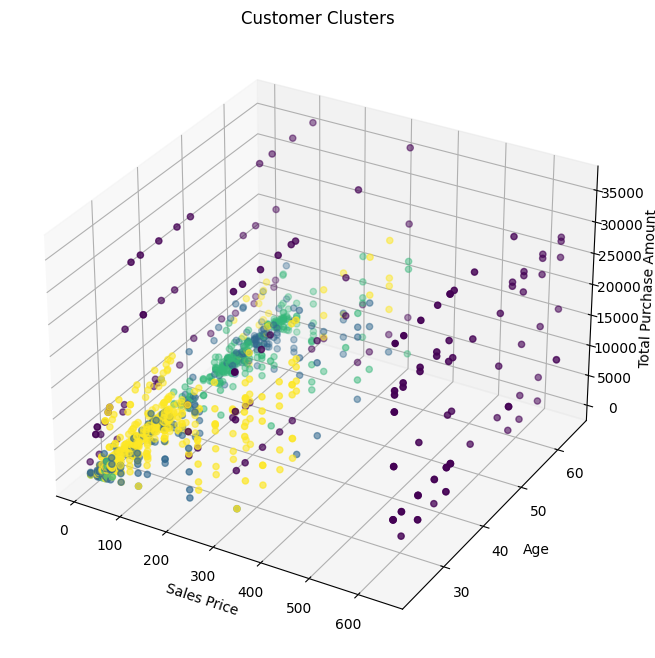

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


# Select relevant features for clustering
selected_features = [
    "sales_price",
    "quantity_sold",
    "age",
    "purchase_frequency",
    "total_purchase_amount",
    "gender",
    "Category"
]

# Handle categorical variables (gender and category)
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["Category"] = le.fit_transform(df["Category"])

# Select features for clustering
X = df[selected_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the autoencoder model
input_dim = X.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, shuffle=True, validation_split=0.2)

# Extract the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Get the encoded representations for the data
encoded_data = encoder.predict(X_scaled)

# Use KMeans on the encoded data for clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(encoded_data)

# clusters
cluster_means = df.groupby("cluster")[selected_features].mean()
print(cluster_means)

# Visualize the clusters (3D plot for three features)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["sales_price"], df["age"], df["total_purchase_amount"], c=df["cluster"], cmap="viridis")
ax.set_xlabel("Sales Price")
ax.set_ylabel("Age")
ax.set_zlabel("Total Purchase Amount")
ax.set_title("Customer Clusters")

plt.show()

